In [ ]:
# Download dataset
!wget https://zenodo.org/api/records/7224690/files-archive

--2024-11-05 21:46:17--  https://zenodo.org/api/records/7224690/files-archive
Resolving zenodo.org (zenodo.org)... 188.185.79.172, 188.184.98.238, 188.184.103.159, ...
Connecting to zenodo.org (zenodo.org)|188.185.79.172|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘files-archive’

files-archive           [               <=>  ]   4.57G  13.1MB/s    in 6m 15s  

2024-11-05 21:52:32 (12.5 MB/s) - ‘files-archive’ saved [4902268961]



In [ ]:
import os
from google.colab import drive

# Create a folder in the root directory
!mkdir -p "/content/drive/MyDrive/FruQ-DB"

In [1]:
!unzip /content/drive/MyDrive/FruQ-DB/FruQ_MK2.zip


Streaming output truncated to the last 5000 lines.
  inflating: content/FruQ-multi-new/content/FruQ-multi/BananaDB/Rotten/Image1001.png  
  inflating: content/FruQ-multi-new/content/FruQ-multi/BananaDB/Rotten/Image965.png  
  inflating: content/FruQ-multi-new/content/FruQ-multi/BananaDB/Rotten/Image979.png  
  inflating: content/FruQ-multi-new/content/FruQ-multi/BananaDB/Rotten/Image1275.png  
  inflating: content/FruQ-multi-new/content/FruQ-multi/BananaDB/Rotten/Image655.png  
  inflating: content/FruQ-multi-new/content/FruQ-multi/BananaDB/Rotten/Image1219.png  
  inflating: content/FruQ-multi-new/content/FruQ-multi/BananaDB/Rotten/Image569.png  
  inflating: content/FruQ-multi-new/content/FruQ-multi/BananaDB/Rotten/Image1267.png  
  inflating: content/FruQ-multi-new/content/FruQ-multi/BananaDB/Rotten/Image811.png  
  inflating: content/FruQ-multi-new/content/FruQ-multi/BananaDB/Rotten/Image1031.png  
  inflating: content/FruQ-multi-new/content/FruQ-multi/BananaDB/Rotten/Image775.png 

# Load Library

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import seaborn as sns
from collections import Counter, defaultdict
import shutil

In [ ]:
rm -rf `find -type d -name .ipynb_checkpoints`

In [ ]:
!zip -r '/content/drive/MyDrive/FruQ-DB/FruQ_MK2.zip"' '/content/FruQ-multi-new/content/FruQ-multi'

# Load Data

In [3]:
path = r'/content/content/FruQ-multi-new/content/FruQ-multi'

In [4]:
shutil.rmtree('/content/content/FruQ-multi-new/content/FruQ-multi/PepperQ')

Change the folder structure

In [5]:
original_dir = path

# Define the root directory for the new folder structure
new_dir = r'/content/FruQ-new'

In [6]:

# Create the new root directory if it doesn't exist
if not os.path.exists(new_dir):
    os.makedirs(new_dir)

# Iterate through the original directory and reorganize the folders
for fruit in os.listdir(original_dir):
    fruit_path = os.path.join(original_dir, fruit)

    if os.path.isdir(fruit_path):
        # Iterate through the "Fresh", "Mild", "Rotten" subdirectories
        for quality in os.listdir(fruit_path):
            quality_path = os.path.join(fruit_path, quality)

            if os.path.isdir(quality_path):
                # Define the new folder name (e.g., "Banana_Fresh")
                new_folder_name = f"{fruit}_{quality}"
                new_folder_path = os.path.join(new_dir, new_folder_name)

                # Create the new folder if it doesn't exist
                if not os.path.exists(new_folder_path):
                    os.makedirs(new_folder_path)

                # Move each image from the old folder to the new folder
                for image_file in os.listdir(quality_path):
                    old_image_path = os.path.join(quality_path, image_file)
                    new_image_path = os.path.join(new_folder_path, image_file)

                    # Move the image file to the new folder
                    shutil.move(old_image_path, new_image_path)

                print(f"Moved images from {quality_path} to {new_folder_path}")

print("Folder restructuring complete!")


Moved images from /content/content/FruQ-multi-new/content/FruQ-multi/WatermeloQ/Rotten to /content/FruQ-new/WatermeloQ_Rotten
Moved images from /content/content/FruQ-multi-new/content/FruQ-multi/WatermeloQ/Fresh to /content/FruQ-new/WatermeloQ_Fresh
Moved images from /content/content/FruQ-multi-new/content/FruQ-multi/WatermeloQ/Mild to /content/FruQ-new/WatermeloQ_Mild
Moved images from /content/content/FruQ-multi-new/content/FruQ-multi/CucumberQ/Rotten to /content/FruQ-new/CucumberQ_Rotten
Moved images from /content/content/FruQ-multi-new/content/FruQ-multi/CucumberQ/Fresh to /content/FruQ-new/CucumberQ_Fresh
Moved images from /content/content/FruQ-multi-new/content/FruQ-multi/CucumberQ/Mild to /content/FruQ-new/CucumberQ_Mild
Moved images from /content/content/FruQ-multi-new/content/FruQ-multi/BananaDB/Rotten to /content/FruQ-new/BananaDB_Rotten
Moved images from /content/content/FruQ-multi-new/content/FruQ-multi/BananaDB/Fresh to /content/FruQ-new/BananaDB_Fresh
Moved images from /c

# EDA

Create helper function to perform eda


apel
  fresh
    gambar.png



apel_fresh
  gambar

In [ ]:
from typing import List, Dict, Set, Tuple

def analyze_multi_fruit_dataset(root_dir: str, exclude_fruits: List[str] = None) -> Dict:
    """
    Comprehensive EDA for multi-fruit image classification dataset with nested directory structure.

    Expected structure:
    root_dir/
        Fruit1/
            Class1/
                image1.jpg
            Class2/
                image2.jpg
        Fruit2/
            Class1/
                image3.jpg
            ...

    Args:
        root_dir: Root directory containing fruit subdirectories
        exclude_fruits: List of fruit names to exclude from analysis

    Returns:
        dict: Statistics about the dataset
    """
    exclude_fruits = [fruit.lower() for fruit in (exclude_fruits or [])]

    stats = {
        'overall_distribution': defaultdict(int),
        'per_fruit_distribution': {},
        'image_sizes': defaultdict(list),
        'aspect_ratios': defaultdict(list),
        'file_formats': defaultdict(list),
        'color_stats': defaultdict(lambda: {
            'means': [],
            'stds': []
        }),
        'image_extensions': defaultdict(int),
        'available_fruits': set(),
        'available_classes': set()
    }

    # First pass: discover all available fruits and classes
    for fruit_type in os.listdir(root_dir):
        fruit_path = os.path.join(root_dir, fruit_type)

        if not os.path.isdir(fruit_path):
            continue

        if fruit_type.lower() in exclude_fruits:
            print(f"Skipping {fruit_type} as requested...")
            continue

        # Add fruit type to available fruits
        stats['available_fruits'].add(fruit_type)

        # Discover classes within each fruit directory
        for class_name in os.listdir(fruit_path):
            class_path = os.path.join(fruit_path, class_name)
            if os.path.isdir(class_path):
                stats['available_classes'].add(class_name)

    # Convert sets to sorted lists for consistent ordering
    available_fruits = sorted(list(stats['available_fruits']))
    available_classes = sorted(list(stats['available_classes']))

    print(f"Detected fruits: {available_fruits}")
    print(f"Detected classes: {available_classes}")

    # Initialize per_fruit_distribution with all possible classes
    for fruit_type in available_fruits:
        stats['per_fruit_distribution'][fruit_type] = {
            class_name: 0 for class_name in available_classes
        }

    # Second pass: analyze images
    for fruit_type in available_fruits:
        fruit_path = os.path.join(root_dir, fruit_type)

        for class_name in available_classes:
            class_path = os.path.join(fruit_path, class_name)

            if not os.path.isdir(class_path):
                continue

            # Get all image files in the class directory
            image_files = [f for f in os.listdir(class_path)
                         if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
            n_images = len(image_files)

            # Update distribution counts
            stats['per_fruit_distribution'][fruit_type][class_name] = n_images
            stats['overall_distribution'][class_name] += n_images

            # Analyze individual images
            for img_file in image_files:
                img_path = os.path.join(class_path, img_file)
                _, file_extension = os.path.splitext(img_file)

                # Count image extensions
                stats['image_extensions'][file_extension.lower()] += 1

                try:
                    with Image.open(img_path) as img:
                        # Image dimensions
                        width, height = img.size
                        stats['image_sizes'][fruit_type].append((width, height))
                        stats['aspect_ratios'][fruit_type].append(width/height)
                        stats['file_formats'][fruit_type].append(img.format)

                        # Color statistics
                        img_array = np.array(img)
                        if len(img_array.shape) == 3:  # Check if image is RGB
                            means = img_array.mean(axis=(0,1))
                            stds = img_array.std(axis=(0,1))
                            stats['color_stats'][fruit_type]['means'].append(means)
                            stats['color_stats'][fruit_type]['stds'].append(stds)

                except Exception as e:
                    print(f"Error processing {img_path}: {str(e)}")

    return stats


In [ ]:
def plot_dataset_analysis(stats):
    """
    Create visualizations for multi-fruit dataset statistics
    Args:
        stats: Dictionary containing dataset statistics
    """
    plt.style.use('Solarize_Light2')
    n_fruits = len(stats['per_fruit_distribution'])

    # Create a figure with subplots
    fig = plt.figure(figsize=(20, 5 * (n_fruits + 1)))

    # 1. Overall Distribution
    plt.subplot(n_fruits + 1, 2, 1)
    plt.bar(stats['overall_distribution'].keys(),
            stats['overall_distribution'].values())
    plt.title('Overall Class Distribution')
    plt.xticks(rotation=45)

    # 2. Per-fruit Distribution
    current_plot = 3
    for fruit_type, distribution in stats['per_fruit_distribution'].items():
        plt.subplot(n_fruits + 1, 2, current_plot)
        plt.bar(distribution.keys(), distribution.values())
        plt.title(f'{fruit_type} Class Distribution')
        plt.xticks(rotation=45)

        # Image size scatter plot
        plt.subplot(n_fruits + 1, 2, current_plot + 1)
        sizes = np.array(stats['image_sizes'][fruit_type])
        if len(sizes) > 0:
            plt.scatter(sizes[:, 0], sizes[:, 1], alpha=0.5)
            plt.xlabel('Width')
            plt.ylabel('Height')
            plt.title(f'{fruit_type} Image Dimensions')

        current_plot += 2

    plt.tight_layout()


In [ ]:
def print_dataset_summary(stats):
    """
    Print summary statistics about the multi-fruit dataset
    Args:
        stats: Dictionary containing dataset statistics
    """
    print("Dataset Summary:")
    print("=" * 50)

    print("\nOverall Distribution:")
    total_images = sum(stats['overall_distribution'].values())
    for class_name, count in stats['overall_distribution'].items():
        percentage = (count / total_images) * 100
        print(f"{class_name}: {count} images ({percentage:.1f}%)")

    print("\nPer-fruit Distribution:")
    print("=" * 50)
    for fruit_type, distribution in stats['per_fruit_distribution'].items():
        print(f"\n{fruit_type}:")
        fruit_total = sum(distribution.values())
        for class_name, count in distribution.items():
            percentage = (count / fruit_total) * 100 if fruit_total > 0 else 0
            print(f"  {class_name}: {count} images ({percentage:.1f}%)")

        # Size statistics for this fruit
        sizes = np.array(stats['image_sizes'][fruit_type])
        if len(sizes) > 0:
            print(f"\n  Image Dimensions:")
            print(f"  Min size: {sizes.min(axis=0)}")
            print(f"  Max size: {sizes.max(axis=0)}")
            print(f"  Mean size: {sizes.mean(axis=0).astype(int)}")

            ratios = np.array(stats['aspect_ratios'][fruit_type])
            print(f"\n  Aspect Ratios:")
            print(f"  Min: {ratios.min():.2f}")
            print(f"  Max: {ratios.max():.2f}")
            print(f"  Mean: {ratios.mean():.2f}")

        # Image format statistics for this fruit
        formats = stats['file_formats'][fruit_type]
        format_counts = defaultdict(int)
        for fmt in formats:
            format_counts[fmt] += 1

        if format_counts:
            print(f"\n  Image Formats:")
            for fmt, count in format_counts.items():
                format_percentage = (count / len(formats)) * 100 if formats else 0
                print(f"  {fmt}: {count} images ({format_percentage:.1f}%)")

    print("=" * 50)

Plot and check the image dataset information

In [ ]:
stats = analyze_multi_fruit_dataset(path)

Detected fruits: ['AvocadoQ', 'BananaDB', 'CucumberQ', 'GrapefruitQ', 'KakiQ', 'PapayaQ', 'PeachQ', 'WatermeloQ', 'tomatoQ']
Detected classes: ['Fresh', 'Mild', 'Rotten']


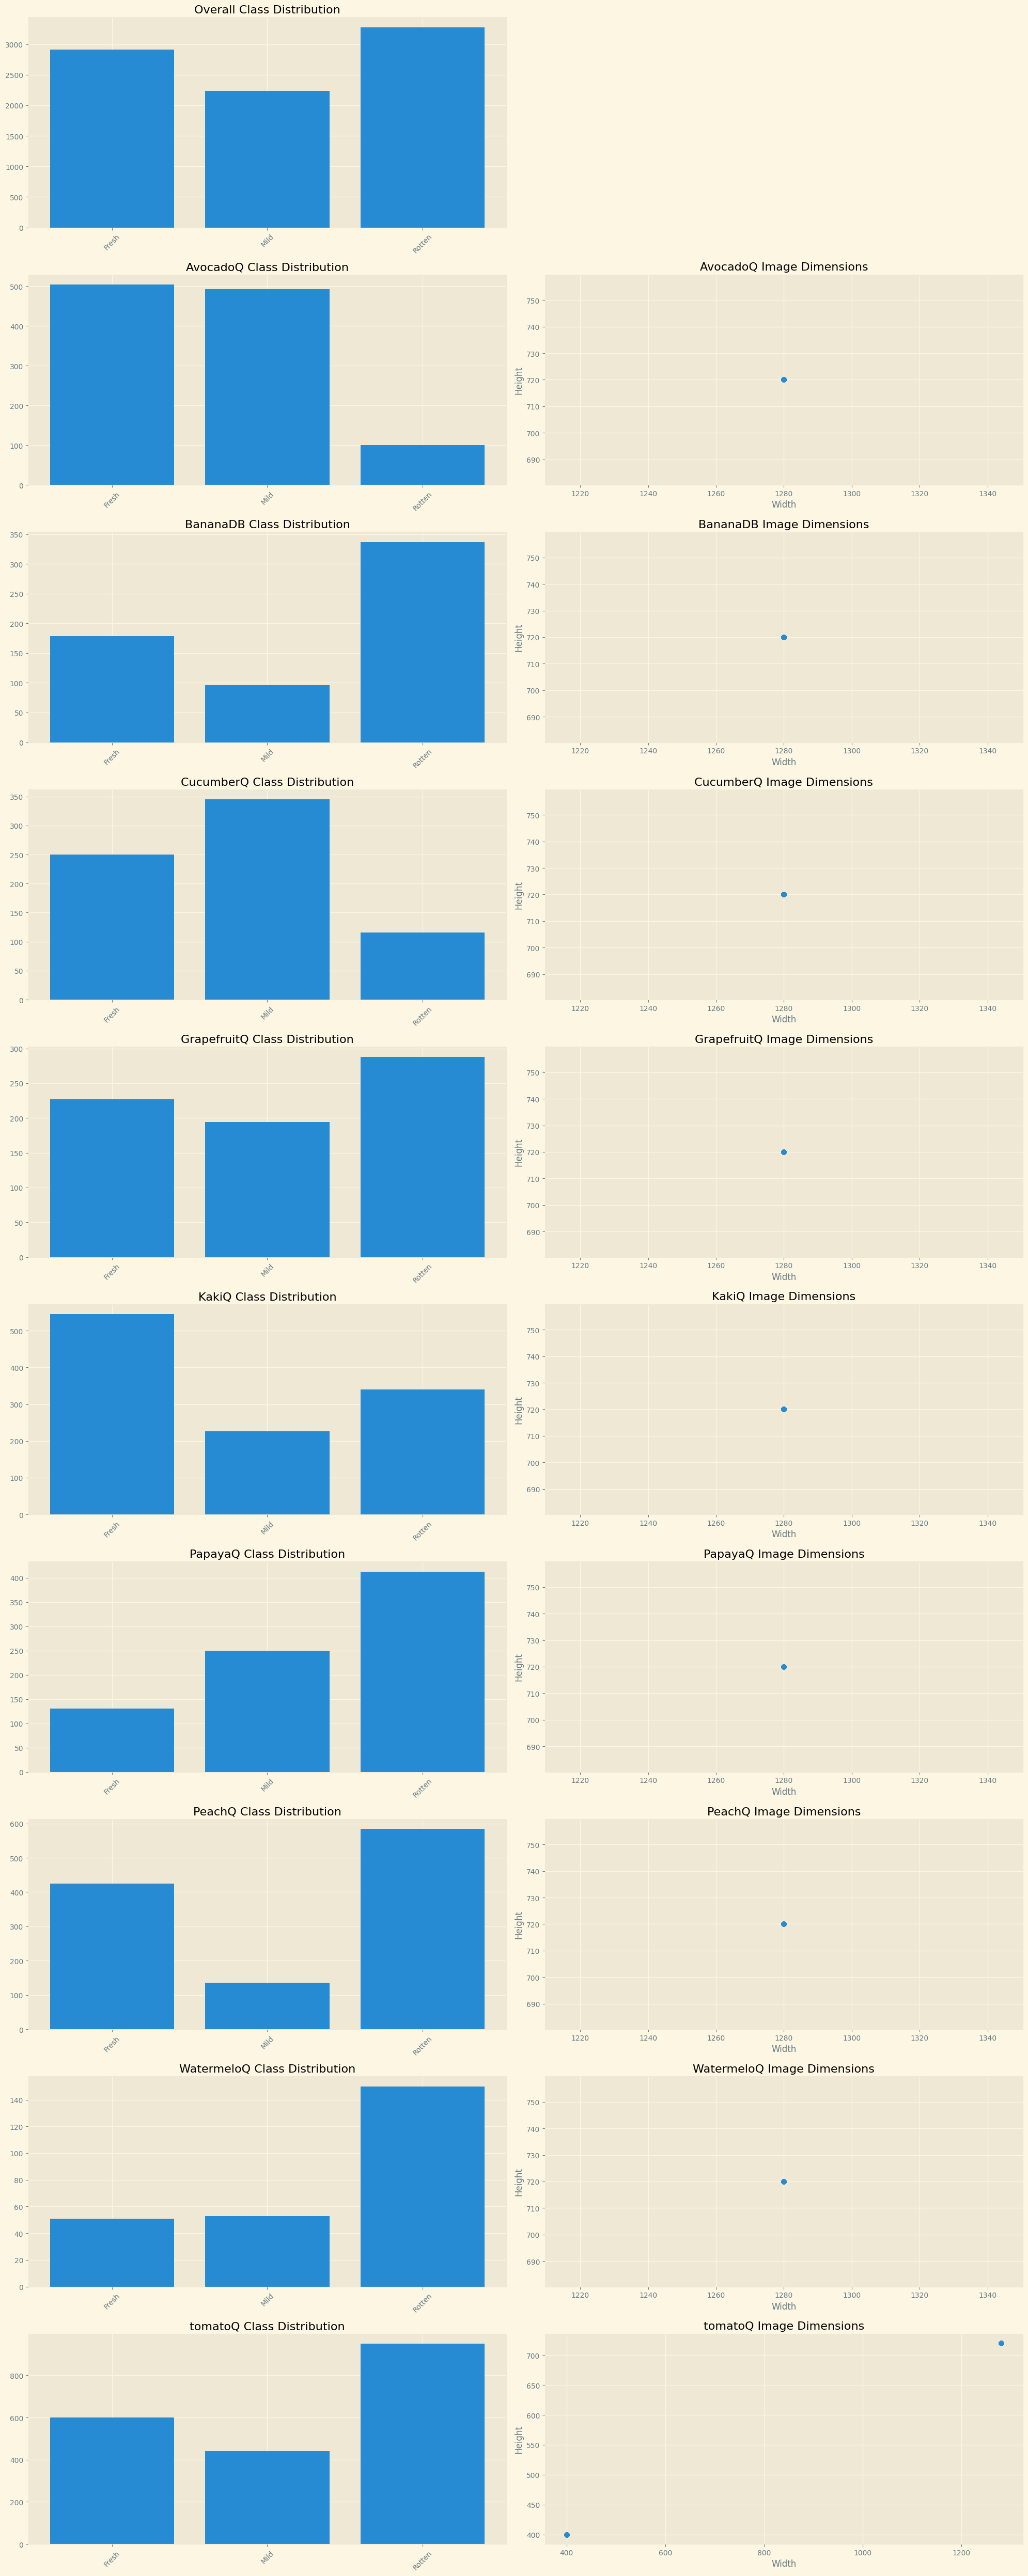

In [ ]:
plot_dataset_analysis(stats)

In [ ]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [ ]:
print_dataset_summary(stats)

Dataset Summary:

Overall Distribution:
Fresh: 2911 images (34.6%)
Mild: 2233 images (26.5%)
Rotten: 3278 images (38.9%)

Per-fruit Distribution:

AvocadoQ:
  Fresh: 504 images (45.9%)
  Mild: 493 images (44.9%)
  Rotten: 100 images (9.1%)

  Image Dimensions:
  Min size: [1280  720]
  Max size: [1280  720]
  Mean size: [1280  720]

  Aspect Ratios:
  Min: 1.78
  Max: 1.78
  Mean: 1.78

  Image Formats:
  PNG: 1097 images (100.0%)

BananaDB:
  Fresh: 179 images (29.2%)
  Mild: 96 images (15.7%)
  Rotten: 337 images (55.1%)

  Image Dimensions:
  Min size: [1280  720]
  Max size: [1280  720]
  Mean size: [1280  720]

  Aspect Ratios:
  Min: 1.78
  Max: 1.78
  Mean: 1.78

  Image Formats:
  PNG: 612 images (100.0%)

CucumberQ:
  Fresh: 250 images (35.2%)
  Mild: 345 images (48.5%)
  Rotten: 116 images (16.3%)

  Image Dimensions:
  Min size: [1280  720]
  Max size: [1280  720]
  Mean size: [1280  720]

  Aspect Ratios:
  Min: 1.78
  Max: 1.78
  Mean: 1.78

  Image Formats:
  PNG: 711 ima

Helper function

In [ ]:
def plot_class_comparisons(stats):
    """
    Create separate plots comparing all fruits for each freshness class
    Args:
        stats: Dictionary containing dataset statistics
    """
    # Get list of all fruits and classes
    fruits = list(stats['per_fruit_distribution'].keys())
    classes = list(stats['available_classes'])

    # Create figure with subplots for each class
    fig, axes = plt.subplots(len(classes), 1, figsize=(12, 5*len(classes)))
    fig.suptitle('Fruit Comparisons by Class', fontsize=16, y=1.02)

    # If only one class, axes will not be an array
    if len(classes) == 1:
        axes = [axes]

    # Create bar plot for each class
    for idx, class_name in enumerate(classes):
        # Collect data for this class across all fruits
        class_counts = [stats['per_fruit_distribution'][fruit][class_name]
                       for fruit in fruits]

        # Create bar plot
        bars = axes[idx].bar(fruits, class_counts)
        axes[idx].set_title(f'{class_name} Class Distribution')
        axes[idx].set_ylabel('Number of Images')
        axes[idx].tick_params(axis='x', rotation=45)

        # Add value labels on top of each bar
        for bar in bars:
            height = bar.get_height()
            axes[idx].text(bar.get_x() + bar.get_width()/2., height,
                         f'{int(height)}',
                         ha='center', va='bottom')

    plt.tight_layout()
    return fig

In [ ]:
def plot_classes_side_by_side(stats):
    """
    Create a single plot with side-by-side bars for each fruit
    Args:
        stats: Dictionary containing dataset statistics
    """
    fruits = list(stats['per_fruit_distribution'].keys())
    classes = list(stats['available_classes'])

    # Set width of each bar and positions of the bars
    bar_width = 0.25
    r = np.arange(len(fruits))

    # Create figure
    plt.figure(figsize=(12, 6))

    # Plot bars for each class
    bars = []
    for idx, class_name in enumerate(classes):
        class_counts = [stats['per_fruit_distribution'][fruit][class_name]
                       for fruit in fruits]
        position = [x + bar_width*idx for x in r]
        bar = plt.bar(position, class_counts, bar_width,
                     label=class_name)
        bars.append(bar)

        # Add value labels on top of each bar
        for b in bar:
            height = b.get_height()
            plt.text(b.get_x() + b.get_width()/2., height,
                    f'{int(height)}',
                    ha='center', va='bottom')

    # Customize the plot
    plt.xlabel('Fruits')
    plt.ylabel('Number of Images')
    plt.title('Distribution of Classes Across Fruits')
    plt.xticks([r + bar_width for r in range(len(fruits))], fruits, rotation=45)
    plt.legend()

    plt.tight_layout()
    return plt.gcf()


In [ ]:
def plot_normalized_distribution(stats):
    """
    Create a normalized (percentage) distribution plot
    Args:
        stats: Dictionary containing dataset statistics
    """
    fruits = list(stats['per_fruit_distribution'].keys())
    classes = list(stats['available_classes'])

    # Calculate percentages
    percentages = {}
    for fruit in fruits:
        total = sum(stats['per_fruit_distribution'][fruit].values())
        percentages[fruit] = {
            class_name: (stats['per_fruit_distribution'][fruit][class_name] / total * 100)
            if total > 0 else 0
            for class_name in classes
        }

    # Create figure
    plt.figure(figsize=(12, 6))

    # Plot bars
    bottom = np.zeros(len(fruits))
    for class_name in classes:
        values = [percentages[fruit][class_name] for fruit in fruits]
        plt.bar(fruits, values, bottom=bottom, label=class_name)
        bottom += values

    # Customize the plot
    plt.xlabel('Fruits')
    plt.ylabel('Percentage')
    plt.title('Normalized Distribution of Classes')
    plt.legend()
    plt.xticks(rotation=45)

    # Add percentage labels
    for fruit in fruits:
        bottom = 0
        for class_name in classes:
            percentage = percentages[fruit][class_name]
            if percentage > 0:  # Only add label if there's a visible section
                plt.text(fruit, bottom + percentage/2,
                        f'{percentage:.1f}%',
                        ha='center', va='center',
                        color='white')
            bottom += percentage

    plt.tight_layout()
    return plt.gcf()

Plot again


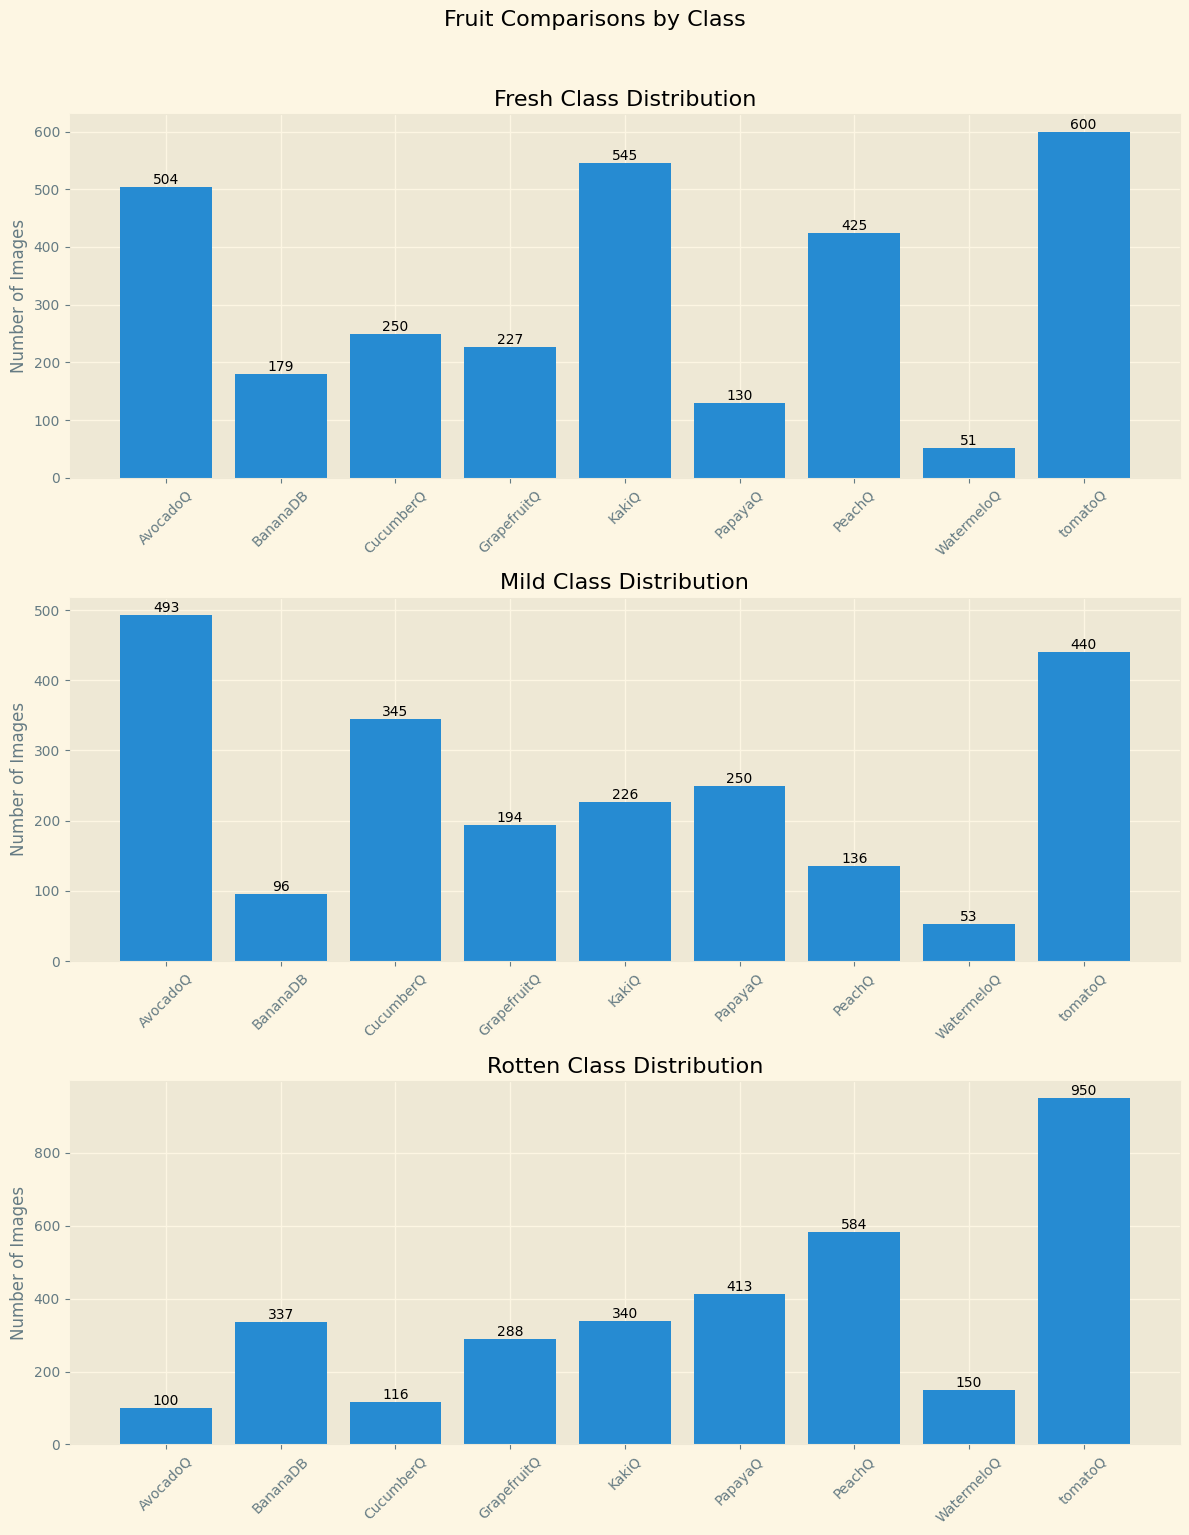

In [ ]:
# Create separate plots for each class
class_comparison_fig = plot_class_comparisons(stats)
plt.figure(class_comparison_fig.number)
plt.show()


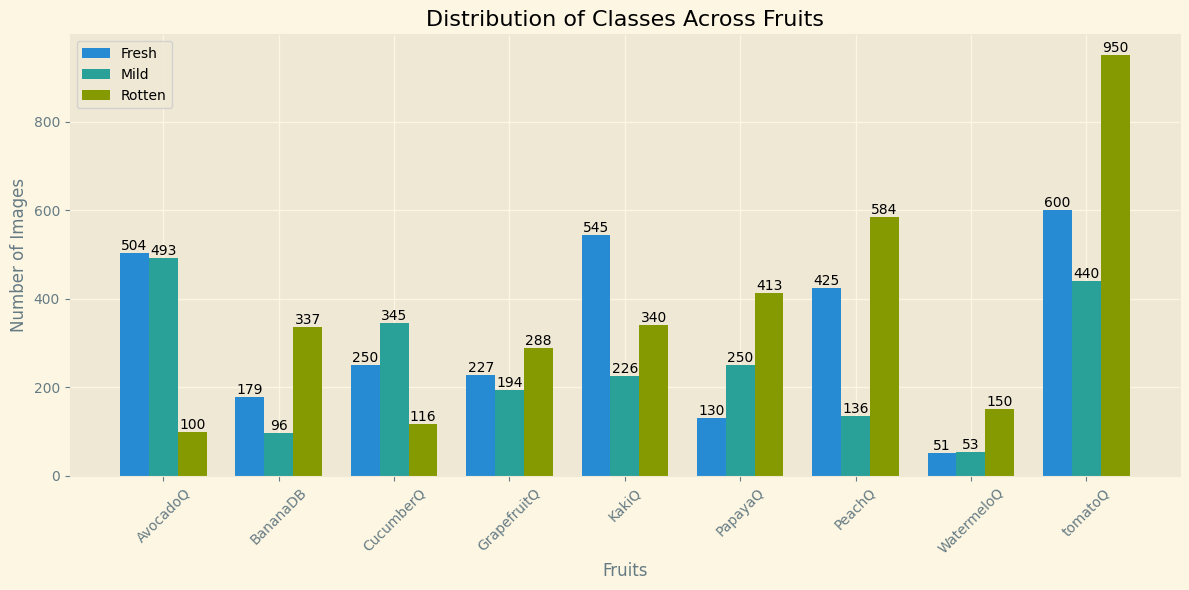

In [ ]:
# Create side-by-side comparison
side_by_side_fig = plot_classes_side_by_side(stats)
plt.figure(side_by_side_fig.number)
plt.show()


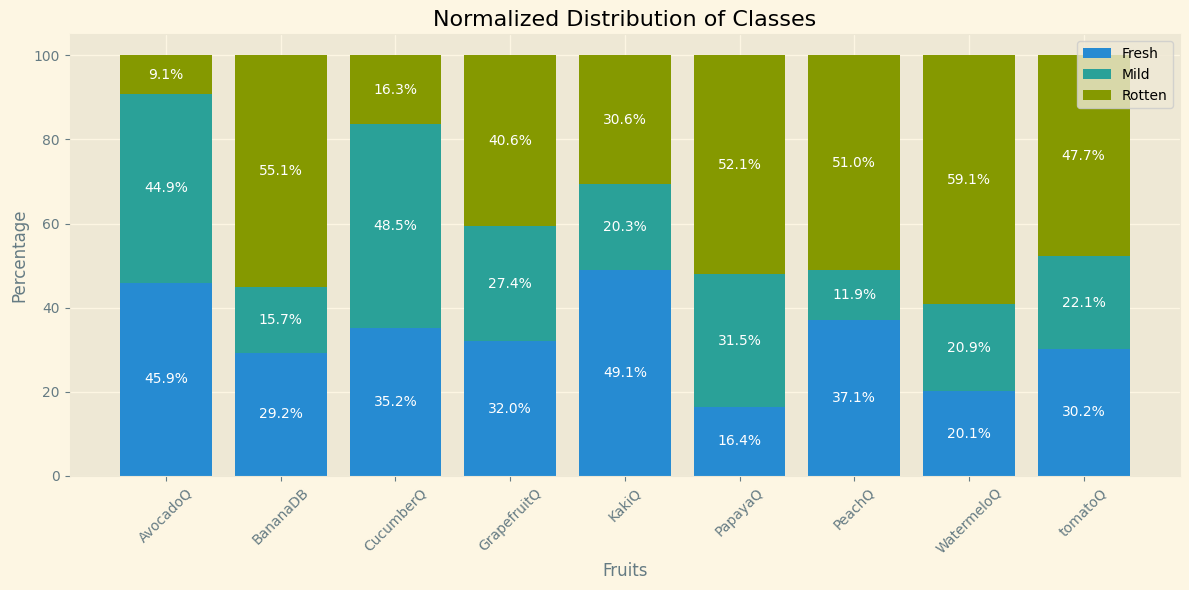

In [ ]:
# Create normalized distribution
normalized_fig = plot_normalized_distribution(stats)
plt.figure(normalized_fig.number)
plt.show()

In [ ]:
# Fix this code to match the new folder structure
from matplotlib import image as mpimg
import random


# Function for plotting 2 random images from a folder
def plot_random_images_from_directory(directory_path):
    """
    Plot 2 random images from a specified directory
    Args:
        directory_path (str): Path to the directory containing images
    """
    # Use the same image file filtering as in analyze_multi_fruit_dataset
    image_files = [f for f in os.listdir(directory_path)
                   if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    # Check if enough images exist
    if len(image_files) < 2:
        print(f"Not enough images in {directory_path}. Found {len(image_files)} images.")
        return

    # Select 2 random images
    selected_images = random.sample(image_files, 2)

    # Create subplot
    fig, axes = plt.subplots(1, 2, figsize=(8, 4), dpi=100)

    # Plot images
    for i, ax in enumerate(axes.flat):
        try:
            img_path = os.path.join(directory_path, selected_images[i])
            # Using PIL Image first for consistency with your analysis function
            with Image.open(img_path) as img:
                img_array = np.array(img)
                ax.imshow(img_array)
                ax.axis('off')
                # Add image size as subtitle
                ax.set_title(f"Size: {img.size[0]}x{img.size[1]}")
        except Exception as e:
            print(f"Error loading image {selected_images[i]}: {str(e)}")
            continue

    # Set main title using the last two parts of the path
    path_parts = directory_path.split(os.sep)
    title = f"{path_parts[-2]} - {path_parts[-1]}"

    fig.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

In [ ]:
for fruit_type, class_stats in stats['per_fruit_distribution'].items():
    for class_name in class_stats.keys():
        class_path = os.path.join(path, fruit_type, class_name)
        if os.path.isdir(class_path):
            print(f"\nDisplaying images from {fruit_type} - {class_name}")
            plot_random_images_from_directory(class_path)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# TODO: Fix this code so it can match the new folder structure

from pathlib import Path

def count_color_channels(root_path):
    """
    Count color channels for images in nested folders and return simple dictionary of counts
    """
    mode_to_channels = {
        'L': 1,    # Grayscale
        'LA': 2,   # Grayscale with alpha
        'P': 1,    # Palette
        'RGB': 3,  # RGB
        'RGBA': 4, # RGB with alpha
        'CMYK': 4, # CMYK
        'YCbCr': 3,# YCbCr
        'HSV': 3,  # HSV
        'LAB': 3,  # LAB
        'I': 1,    # Integer pixels
        'F': 1     # Float pixels
    }

    channel_counts = {}
    root = Path(root_path)

    # Walk through all fruits
    for fruit_dir in root.iterdir():
        if not fruit_dir.is_dir():
            continue

        # Walk through all conditions
        for condition_dir in fruit_dir.iterdir():
            if not condition_dir.is_dir():
                continue

            # Process all images
            for img_path in condition_dir.glob('*.*'):
                if img_path.suffix.lower() in ['.jpg', '.jpeg', '.png', '.bmp']:
                    try:
                        with Image.open(img_path) as img:
                            mode = img.mode
                            channels = mode_to_channels.get(mode)

                            if channels is not None:
                                channel_counts[channels] = channel_counts.get(channels, 0) + 1

                    except Exception as e:
                        continue

    return channel_counts

In [ ]:
counts = count_color_channels(path)
print(counts)

{3: 8422}


# Preprocess Image

In [ ]:
# save the preprocessed image
# not sure this code is needed or no
import cv2

# Set the path to the main folder containing the images
input_folder = new_dir
output_folder = r'/content/processed_image'
target_resolution = (224, 224)  # Define the target resolution, e.g., 224x224

def resize_and_pad_image(input_path, output_path, target_resolution):
    # Read the image
    image = cv2.imread(input_path)
    if image is None:
        print(f"Warning: Unable to read {input_path}")
        return

    # Get current image size
    original_height, original_width = image.shape[:2]
    target_width, target_height = target_resolution

    # Calculate the scaling factor
    scale = min(target_width / original_width, target_height / original_height)
    new_width = int(original_width * scale)
    new_height = int(original_height * scale)

    # Resize the image with aspect ratio preserved
    resized_image = cv2.resize(image, (new_width, new_height))

    # Create a new image with the target size and a black background
    padded_image = np.zeros((target_height, target_width, 3), dtype=np.uint8)

    # Calculate the top-left corner for centering the resized image
    x_offset = (target_width - new_width) // 2
    y_offset = (target_height - new_height) // 2

    # Place the resized image onto the center of the black background
    padded_image[y_offset:y_offset + new_height, x_offset:x_offset + new_width] = resized_image

    # Save the final image
    cv2.imwrite(output_path, padded_image)

def process_images(input_folder, output_folder, target_resolution):
    for root, _, files in os.walk(input_folder):
        for file in files:
            if file.endswith(('.jpg', '.jpeg', '.png')):  # Filter image files
                # Construct the full input path
                input_path = os.path.join(root, file)
                # Construct the output path, maintaining the folder structure
                relative_path = os.path.relpath(root, input_folder)
                output_path = os.path.join(output_folder, relative_path, file)

                # Create output directory if it doesn't exist
                os.makedirs(os.path.dirname(output_path), exist_ok=True)

                # Resize and save the image with padding
                resize_and_pad_image(input_path, output_path, target_resolution)

# Run the function to process all images
process_images(input_folder, output_folder, target_resolution)

In [ ]:
for fruit_type, class_stats in stats['per_fruit_distribution'].items():
    for class_name in class_stats.keys():
        class_path = os.path.join(output_folder, fruit_type, class_name)
        if os.path.isdir(class_path):
            print(f"\nDisplaying images from {fruit_type} - {class_name}")
            plot_random_images_from_directory(class_path)

Output hidden; open in https://colab.research.google.com to view.

# Train, Test Split

In [ ]:
# this code used for train and test split before i remember using tf library are simpler
from sklearn.model_selection import train_test_split
import shutil

def organize_and_split_dataset(root_dir, output_dir, val_split=0.2, seed=42):
    """
    Organizes and splits dataset maintaining the fruit-condition hierarchy

    root_dir: Original dataset directory
    output_dir: Where to save train/val splits
    """
    # Create output directories
    train_dir = os.path.join(output_dir, 'train')
    val_dir = os.path.join(output_dir, 'val')

    # Create directories if they don't exist
    for dir_path in [train_dir, val_dir]:
        if os.path.exists(dir_path):
            shutil.rmtree(dir_path)
        os.makedirs(dir_path)

    # Get all fruit types
    fruit_types = [f for f in os.listdir(root_dir)
                  if os.path.isdir(os.path.join(root_dir, f))]

    for fruit in fruit_types:
        print(f"\nProcessing {fruit}...")
        fruit_path = os.path.join(root_dir, fruit)
        conditions = ['Fresh', 'Mild', 'Rotten']

        # Create fruit directories in train and val
        os.makedirs(os.path.join(train_dir, fruit), exist_ok=True)
        os.makedirs(os.path.join(val_dir, fruit), exist_ok=True)

        for condition in conditions:
            condition_path = os.path.join(fruit_path, condition)
            if not os.path.exists(condition_path):
                print(f"Warning: {condition} folder not found for {fruit}")
                continue

            # Create condition directories
            os.makedirs(os.path.join(train_dir, fruit, condition), exist_ok=True)
            os.makedirs(os.path.join(val_dir, fruit, condition), exist_ok=True)

            # Get all images in the condition folder
            images = [f for f in os.listdir(condition_path)
                     if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

            # Split images into train and validation
            train_images, val_images = train_test_split(
                images,
                test_size=val_split,
                random_state=seed,
                shuffle=True
            )

            # Copy images to respective directories
            for img in train_images:
                src = os.path.join(condition_path, img)
                dst = os.path.join(train_dir, fruit, condition, img)
                shutil.copy2(src, dst)

            for img in val_images:
                src = os.path.join(condition_path, img)
                dst = os.path.join(val_dir, fruit, condition, img)
                shutil.copy2(src, dst)

            print(f"{fruit} - {condition}:")
            print(f"  Train: {len(train_images)}")
            print(f"  Val: {len(val_images)}")

# Augment

In [10]:
from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomBrightness(0.2),
    layers.RandomTranslation(0.2, 0.2)
])

# Create Dataset

In [11]:
SEED = 123

def create_dataset(data_dir, img_size=(224, 224), batch_size=32, buffer_size=1000):
    """
    Creates tf.data.Dataset from the organized directory
    """
    # Create the dataset
    train_data = tf.keras.utils.image_dataset_from_directory(
        data_dir,
        labels='inferred',
        label_mode='categorical',
        class_names=None,
        color_mode='rgb',
        batch_size=batch_size,
        image_size=img_size,
        shuffle=True,
        seed=SEED,
        validation_split=0.2,
        subset='training',
        interpolation='bilinear'
    )

    class_names = train_data.class_names

    # # Configure the dataset for performance
    # train_data = train_data.cache()\
    #                  .shuffle(buffer_size)\
    #                  .prefetch(buffer_size=tf.data.AUTOTUNE)

    val_data = tf.keras.utils.image_dataset_from_directory(
        data_dir,
        labels='inferred',
          label_mode='categorical',
          class_names=class_names,
          color_mode='rgb',
          batch_size=batch_size,
          image_size=img_size,
          shuffle=True,
          seed=SEED,
          validation_split=0.2,
          subset='validation',
          interpolation='bilinear'
    )


    return train_data, val_data, class_names


In [12]:
# Create train and validation datasets
train_data, val_data, class_names = create_dataset(new_dir)
print(f"Images of train dataset have shape: {train_data.element_spec[0].shape}")
print(f"Labels of train dataset have shape: {train_data.element_spec[1].shape}")
print(f"Images of validation dataset have shape: {val_data.element_spec[0].shape}")
print(f"Labels of validation dataset have shape: {val_data.element_spec[1].shape}")
print(f"Class names are: {class_names}")

Found 8422 files belonging to 27 classes.
Using 6738 files for training.
Found 8422 files belonging to 27 classes.
Using 1684 files for validation.
Images of train dataset have shape: (None, 224, 224, 3)
Labels of train dataset have shape: (None, 27)
Images of validation dataset have shape: (None, 224, 224, 3)
Labels of validation dataset have shape: (None, 27)
Class names are: ['AvocadoQ_Fresh', 'AvocadoQ_Mild', 'AvocadoQ_Rotten', 'BananaDB_Fresh', 'BananaDB_Mild', 'BananaDB_Rotten', 'CucumberQ_Fresh', 'CucumberQ_Mild', 'CucumberQ_Rotten', 'GrapefruitQ_Fresh', 'GrapefruitQ_Mild', 'GrapefruitQ_Rotten', 'KakiQ_Fresh', 'KakiQ_Mild', 'KakiQ_Rotten', 'PapayaQ_Fresh', 'PapayaQ_Mild', 'PapayaQ_Rotten', 'PeachQ_Fresh', 'PeachQ_Mild', 'PeachQ_Rotten', 'WatermeloQ_Fresh', 'WatermeloQ_Mild', 'WatermeloQ_Rotten', 'tomatoQ_Fresh', 'tomatoQ_Mild', 'tomatoQ_Rotten']


TypeError: only integer scalar arrays can be converted to a scalar index

<Figure size 1000x1000 with 0 Axes>

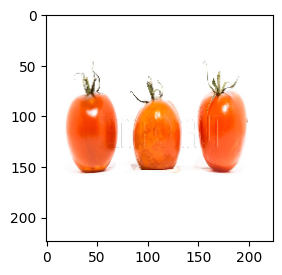

In [13]:
for images, labels in train_data.take(1):  # Take one batch
    # Display the first 9 images
    plt.figure(figsize=(10, 10))
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))  # Convert tensor to numpy array and display
        # Convert the label to an integer and use it to get the class name
        plt.title(f"Label: {class_names[labels[i].numpy()]}")
        plt.axis("off")
    plt.show()


# Modeling

In [17]:
def create_model():
    """Create the classifier model

    Returns:
        tf.keras.model.Sequential: CNN for multi-class classification
    """
    ### START CODE HERE ###

    # Define the model
    # Use no more than 2 Conv2D and 2 MaxPooling2D
    model = tf.keras.models.Sequential([
        # Define an input layer
        tf.keras.Input(shape=(224, 224, 3)), # Set correct input size
        data_augmentation,
        # Rescale images
        tf.keras.layers.Rescaling(1./255),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(len(class_names), activation='softmax')
        ])

    model.compile(optimizer = 'rmsprop',
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])


    return model

In [18]:
model= create_model()
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 128)       │          36,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 373248)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 373248)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │      23,887,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 27)                  │           1,755 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,927,579 (91.28 MB)

 Trainable params: 23,927,579 (91.28 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
print(f'Input shape: {model.input_shape}')
print(f'Output shape: {model.output_shape}')

Input shape: (None, 224, 224, 3)
Output shape: (None, 27)


In [20]:
for images, labels in train_data.take(1):
	example_batch_images = images
	example_batch_labels = labels
try:
  model.evaluate(example_batch_images, example_batch_labels, verbose=False)
except:
	print("Your model is not compatible with the dataset you defined earlier. Check that the loss function, last layer and label_mode are compatible with one another.")
else:
	predictions = model.predict(example_batch_images, verbose=False)
	print(f"predictions have shape: {predictions.shape}")

predictions have shape: (32, 27)


In [21]:
# Train your model
history = model.fit(train_data,
                    epochs=15,
                    validation_data=val_data)

Epoch 1/15
211/211 ━━━━━━━━━━━━━━━━━━━━ 162s 737ms/step - accuracy: 0.2701 - loss: 3.5617 - val_accuracy: 0.5647 - val_loss: 1.1045
Epoch 2/15
211/211 ━━━━━━━━━━━━━━━━━━━━ 188s 692ms/step - accuracy: 0.6859 - loss: 0.9061 - val_accuracy: 0.7013 - val_loss: 0.8736
Epoch 3/15
211/211 ━━━━━━━━━━━━━━━━━━━━ 199s 680ms/step - accuracy: 0.7652 - loss: 0.6037 - val_accuracy: 0.7286 - val_loss: 0.8964
Epoch 4/15
211/211 ━━━━━━━━━━━━━━━━━━━━ 142s 673ms/step - accuracy: 0.8045 - loss: 0.5313 - val_accuracy: 0.5368 - val_loss: 1.6966
Epoch 5/15
211/211 ━━━━━━━━━━━━━━━━━━━━ 143s 678ms/step - accuracy: 0.8229 - loss: 0.4744 - val_accuracy: 0.6093 - val_loss: 1.3207
Epoch 6/15
211/211 ━━━━━━━━━━━━━━━━━━━━ 200s 672ms/step - accuracy: 0.8573 - loss: 0.3956 - val_accuracy: 0.8171 - val_loss: 0.4211
Epoch 7/15
211/211 ━━━━━━━━━━━━━━━━━━━━ 144s 679ms/step - accuracy: 0.8669 - loss: 0.3378 - val_accuracy: 0.8462 - val_loss: 0.3925
Epoch 8/15
211/211 ━━━━━━━━━━━━━━━━━━━━ 200s 671ms/step - accuracy: 0.8714 -

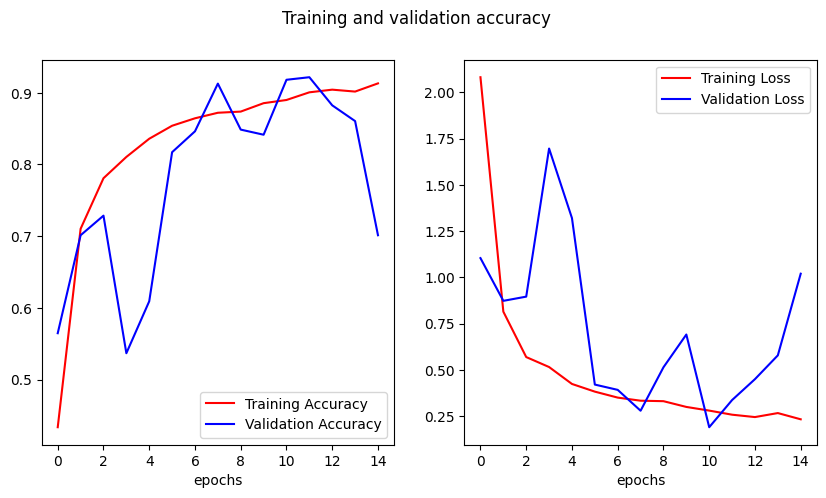

In [22]:
# Get training and validation accuracies
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Training and validation accuracy')

for i, (data, label) in enumerate(zip([(acc, val_acc), (loss, val_loss)], ["Accuracy", "Loss"])):
    ax[i].plot(epochs, data[0], 'r', label="Training " + label)
    ax[i].plot(epochs, data[1], 'b', label="Validation " + label)
    ax[i].legend()
    ax[i].set_xlabel('epochs')

plt.show()

overfit ?

In [23]:
model.save(r'/content/drive/MyDrive/Kepston_bangkit/cnn_sratch_mk2.keras')

In [24]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load the pre-trained model
model = tf.keras.models.load_model(r'/content/drive/MyDrive/cnn_sratch_mk3.keras') # correct the path

# Load the image you want to classify
image_path = r'/content/FruQ-new/AvocadoQ_Fresh/Image1001.png' # correct the path
img = load_img(image_path, target_size=(224, 224))

# Preprocess the image
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0

# Make the prediction
prediction = model.predict(x)

# Get the class index with the highest probability
class_index = np.argmax(prediction[0])
class_index2 = np.argmax(prediction[1])

# Get the class name
if class_index < len(class_names):
    class_name = class_names[class_index]
else:
    class_name = "Unknown"

# Get the probability of the predicted class
accuracy = prediction[0][class_index] * 100
# Print the results
print(f'The image belongs to the "{class_name}" class with an accuracy of {accuracy:.2f}%.')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
The image belongs to the "Unknown" class with an accuracy of 7.44%.


In [35]:
from sklearn.metrics import confusion_matrix, classification_report

def metric(model, generator, class_names, title="Confusion Matrix"):
    X, y_true = [], []
    for batch_X, batch_y in generator:
        X.extend(batch_X)
        y_true.extend(batch_y)
    X = np.array(X)
    y_true = np.array(y_true)

    # Get predictions using the collected data
    y_pred = model.predict(X)
    y_pred = np.argmax(y_pred, axis=1)

     # Convert y_true to multiclass format if it's in one-hot encoded format
    if y_true.ndim == 2 and y_true.shape[1] > 1:  # Check if y_true is one-hot encoded
        y_true = np.argmax(y_true, axis=1)  # Convert to multiclass format

    # Get unique class labels from predictions and true labels
    unique_labels = np.unique(np.concatenate((y_true, y_pred)))
    num_classes = len(unique_labels)

    # Print unique labels for analysis
    print("Unique labels:", unique_labels)

    # Check if the number of class names matches the number of unique labels
    if num_classes != len(class_names):
        print(f"Warning: Number of classes ({num_classes}) does not match size of target_names ({len(class_names)}).")
        print("This might be due to new classes in the dataset.")
        print("Printing predicted and true labels for debugging:")
        print("y_pred:", y_pred)
        print("y_true:", y_true)

    # Option 1: Adjust target_names (ensure accurate class names for all labels)
    # class_names = [f"Class_{i}" for i in range(num_classes)]  # Replace with the class name mapping
    # Option 2: Filter predictions and true labels to match existing class_names
    valid_indices = np.isin(y_true, np.arange(len(class_names)))  # Keep labels within class_names
    y_true = y_true[valid_indices]
    y_pred = y_pred[valid_indices]


    # Create confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Create figure and axis for confusion matrix
    plt.figure(figsize=(12, 8))

    # Create subplot layout - confusion matrix on left, metrics on right
    plt.subplot(1, 2, 1)

    # Plot confusion matrix
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        xticklabels=class_names,
        yticklabels=class_names
    )

    plt.title(f"{title}\nConfusion Matrix")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

    # Calculate metrics
    report = classification_report(
        y_true,
        y_pred,
        target_names=class_names,
        output_dict=True
    )

    # Create metrics visualization
    plt.subplot(1, 2, 2)

    # Extract metrics for each class and macro average
    metrics_data = {
        'Precision': [],
        'Recall': [],
        'F1-Score': []
    }

    # Get metrics for each class
    for class_name in class_names:
        metrics_data['Precision'].append(report[class_name]['precision'])
        metrics_data['Recall'].append(report[class_name]['recall'])
        metrics_data['F1-Score'].append(report[class_name]['f1-score'])

    # Add macro average
    metrics_data['Precision'].append(report['macro avg']['precision'])
    metrics_data['Recall'].append(report['macro avg']['recall'])
    metrics_data['F1-Score'].append(report['macro avg']['f1-score'])

    # Create labels for all classes plus macro average
    all_labels = class_names + ['Macro Avg']

    # Create bar positions
    x = np.arange(len(all_labels))
    width = 0.25

    # Plot bars for each metric
    plt.bar(x - width, metrics_data['Precision'], width, label='Precision')
    plt.bar(x, metrics_data['Recall'], width, label='Recall')
    plt.bar(x + width, metrics_data['F1-Score'], width, label='F1-Score')

    plt.xlabel('Classes')
    plt.ylabel('Score')
    plt.title(f'{title}\nPrecision, Recall, and F1-Score')
    plt.xticks(x, all_labels, rotation=45)
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Print detailed classification report
    print("\nDetailed Classification Report:")
    print("\nPer-Class Metrics:")
    print("-" * 60)
    for class_name in class_names:
        print(f"\n{class_name}:")
        print(f"Precision: {report[class_name]['precision']:.3f}")
        print(f"Recall: {report[class_name]['recall']:.3f}")
        print(f"F1-Score: {report[class_name]['f1-score']:.3f}")

    print("\nMacro-Averaged Metrics:")
    print("-" * 60)
    print(f"Macro Precision: {report['macro avg']['precision']:.3f}")
    print(f"Macro Recall: {report['macro avg']['recall']:.3f}")
    print(f"Macro F1-Score: {report['macro avg']['f1-score']:.3f}")

    # Print support (number of samples per class)
    print("\nClass Support (Number of Samples):")
    print("-" * 60)
    for class_name in class_names:
        print(f"{class_name}: {report[class_name]['support']}")

In [36]:
def evaluate_models(model, val):
    # Quality Classification Evaluation
    print("\nEvaluating  Classification Model...")
    metric(
        model,
        val,
        class_names,
        f"{type} Classification Confusion Matrix"
    )


Evaluating  Classification Model...
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
Unique labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]
This might be due to new classes in the dataset.
Printing predicted and true labels for debugging:
y_pred: [26  7 12 ...  1 12 31]
y_true: [21  7 12 ...  1 12 26]


ValueError: Number of classes, 32, does not match size of target_names, 27. Try specifying the labels parameter

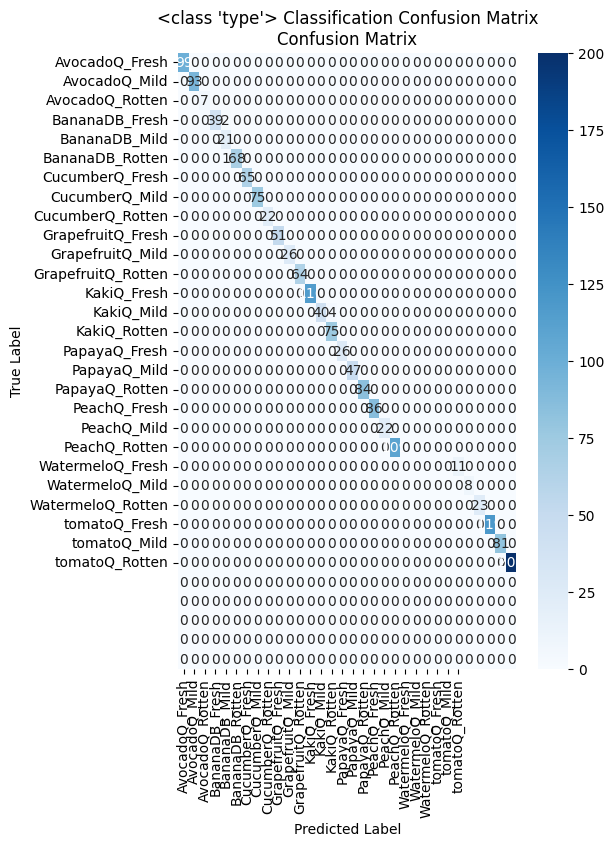

In [37]:
evaluate_models(model, val_data)